# Smartphone Price Prediction Analysis

## 1) Data Preperation

### importing packeges

In [2]:
import pandas as pd
import numpy as np
#import klib 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

### Reading data

In [4]:
train_df=pd.read_csv('../data/train.csv')
test_df=pd.read_csv('../data/test.csv')

Dataset columns description:

■ id - ID

■ battery_power - Total energy a battery can store in one time measured in mAh

■ blue - Has Bluetooth or not

■ clock_speed - The speed at which the microprocessor executes instructions

■ dual_sim - Has dual sim support or not

■ fc - Front Camera megapixels

■ four_g - Has 4G or not

■ int_memory - Internal Memory in Gigabytes

■ m_dep - Mobile Depth in cm

■ mobile_wt - Weight of mobile phone

■ n_cores - Number of cores of the processor

■ pc - Primary Camera megapixels

■ px_height - Pixel Resolution Height

■ px_width - Pixel Resolution Width

■ ram - Random Access Memory in Megabytes

■ sc_h - Screen Height of mobile in cm

■ sc_w - Screen Width of mobile in cm

■ talk_time - longest time that a single battery charge will last when you are

■ three_g - Has 3G or not

■ touch_screen - Has touch screen or not

■ wifi - Has wifi or not

■ price_range - This is the target variable with the value of:

● 0 (low cost)

● 1 (medium cost)

● 2 (high cost)

● 3 (very high cost)


### Data Overview

we will check out trainning data first

In [3]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

we dont have string values only numiric

In [5]:
train_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

not alot of missing values it should be easy to handel it 

In [6]:
train_df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1135
px_width         1109
ram              1561
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

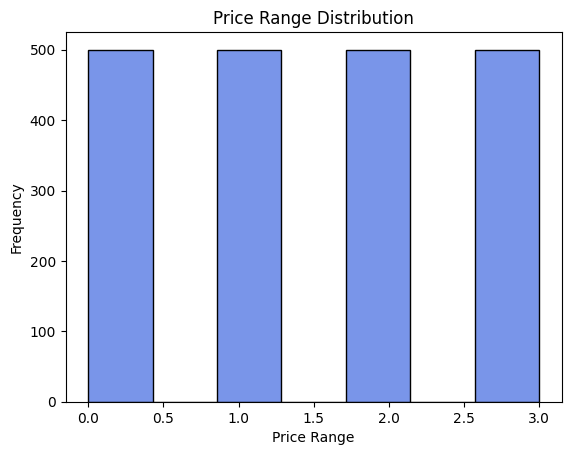

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


In [7]:
sns.histplot(data=train_df, x="price_range", bins=7, color='royalblue', alpha=0.7)
plt.title("Price Range Distribution")
plt.xlabel("Price Range")
plt.ylabel("Frequency")
plt.show()
print(train_df['price_range'].value_counts())

<font color='red'>Good News ! the data is perfictly balanced</font>

now let us check out testing data

In [8]:
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


We shuld keep in mind that target column (price_range) does not appear in the test data, also we have <font color='red'>id</font> column that does not appear in the training data

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [10]:
test_df.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

no null vales

In [11]:
test_df.nunique()

id               1000
battery_power     721
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height         694
px_width          743
ram               872
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
dtype: int64

## 2) Handling missing values

we colud just drop the row that countains missing values but lets take a look first on some columns

In [12]:
train_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### fc and pc

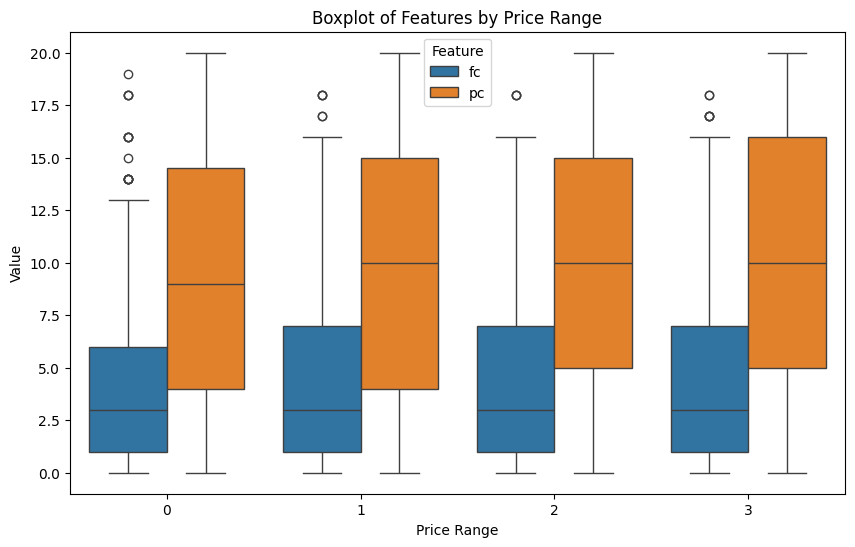

In [13]:
# Melt the DataFrame to long format
melted_df = train_df.melt(id_vars='price_range', value_vars=['fc','pc'], 
                           var_name='feature', value_name='value')

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_df, x='price_range', y='value', hue='feature')
plt.title('Boxplot of Features by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Value')
plt.legend(title='Feature')
plt.show()


the median values are consistent across price ranges, the best option would be median imputation. This method is simple and will preserve the overall distribution of the data without introducing bias

also we can have a hint on this columns that it is not correlated with target since its values have similar Medians across price ranges, overlapping Interquartile Ranges (IQR) and a consistent spread, we will keep this in mind

In [14]:
fc_median = train_df['fc'].median()
train_df['fc']= train_df['fc'].fillna(fc_median)

pc_median = train_df['pc'].median()
train_df['pc']= train_df['pc'].fillna(pc_median)

#### four_g

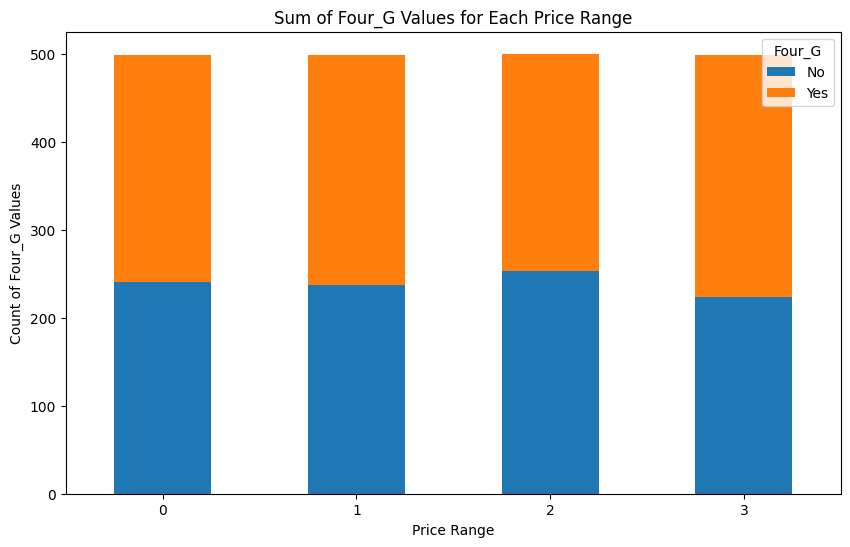

In [15]:
count_df = train_df.groupby('price_range')['four_g'].value_counts().unstack(fill_value=0)

# Plotting
count_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding titles and labels
plt.title('Sum of Four_G Values for Each Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count of Four_G Values')
plt.xticks(rotation=0)  # Rotate x labels for better visibility
plt.legend(title='Four_G', labels=['No', 'Yes'], loc='upper right')
plt.show()

In [16]:
train_df['four_g']=train_df['four_g'].fillna(train_df['four_g'].mode()[0])

#### sc_h and sc_w     

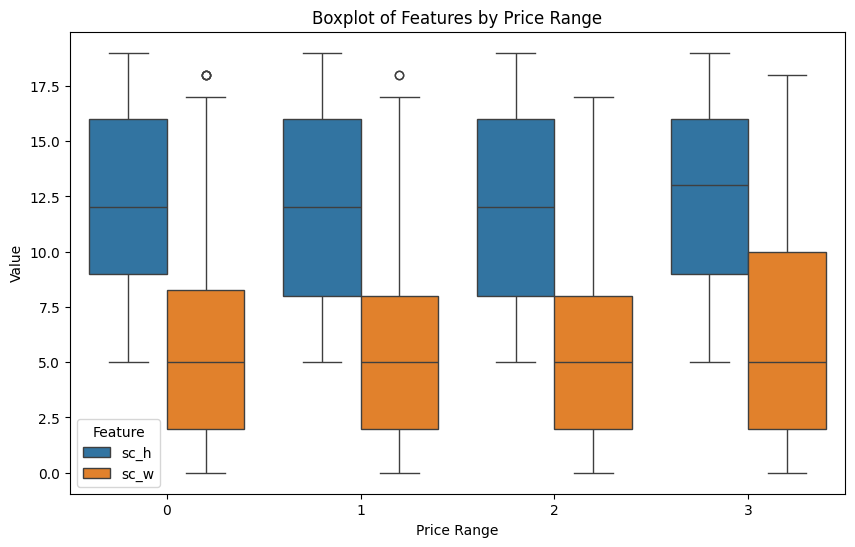

In [17]:
# Melt the DataFrame to long format
melted_df = train_df.melt(id_vars='price_range', value_vars=['sc_h','sc_w'], 
                           var_name='feature', value_name='value')

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_df, x='price_range', y='value', hue='feature')
plt.title('Boxplot of Features by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Value')
plt.legend(title='Feature')
plt.show()

same case as fc and pc

In [18]:
sc_h_median = train_df['sc_h'].median()
train_df['sc_h']= train_df['sc_h'].fillna(sc_h_median)

sc_w_median = train_df['sc_w'].median()
train_df['sc_w']= train_df['sc_w'].fillna(sc_w_median)

#### ram

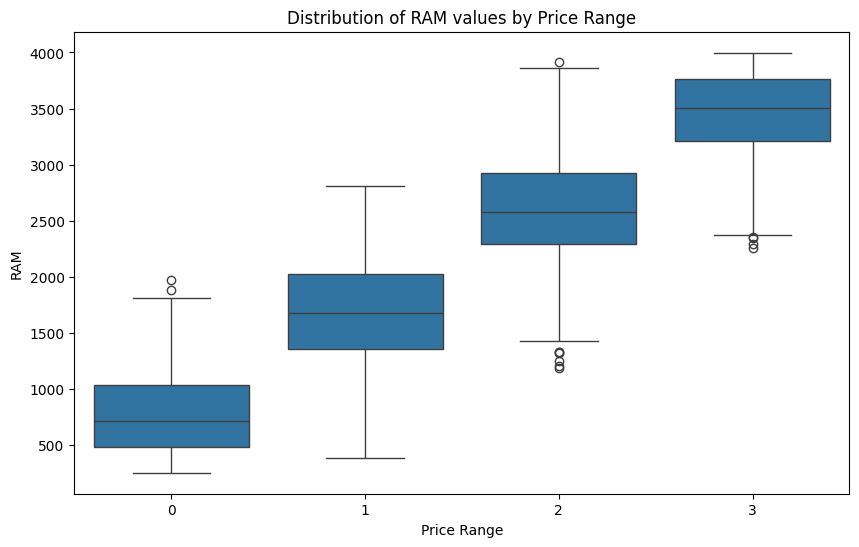

In [19]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='price_range', y='ram', data=train_df)

plt.title('Distribution of RAM values by Price Range')
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.show()

The box plot shows a clear positive correlation between ram and price range. As the price range increases, the median RAM value also increases, indicating that higher-priced phones tend to have more RAM. The spread of RAM values grows wider in higher price ranges, but the median shifts upwards consistently from price range 0 to 3. We can also see a few outliers in the lower price ranges, where some phones have more RAM than expected for their category. Overall, RAM seems to be a strong indicator of a phone’s price range.

Since the relationship between RAM and price_range appears strong, based on the box plot, a good strategy for imputing missing values for RAM would be to fill the NaN values with the median (or mean) RAM value corresponding to each price_range. This ensures that the missing values align with the general distribution of RAM for phones in the same price category.

In [20]:
# Group by price range and calculate median RAM for each group
price_range_medians = train_df.groupby('price_range')['ram'].median()

# Fill missing values in 'ram' using the median of corresponding price range
train_df['ram'] = train_df.apply(
    lambda row: price_range_medians[row['price_range']] if pd.isnull(row['ram']) else row['ram'], 
    axis=1
)

we will drop the rest of nan values

In [21]:
train_df = train_df.dropna()

In [22]:
train_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## 3) Exploratory Data Analysis (EDA)

In [23]:
train_df.nunique()

battery_power    1090
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1132
px_width         1107
ram              1556
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

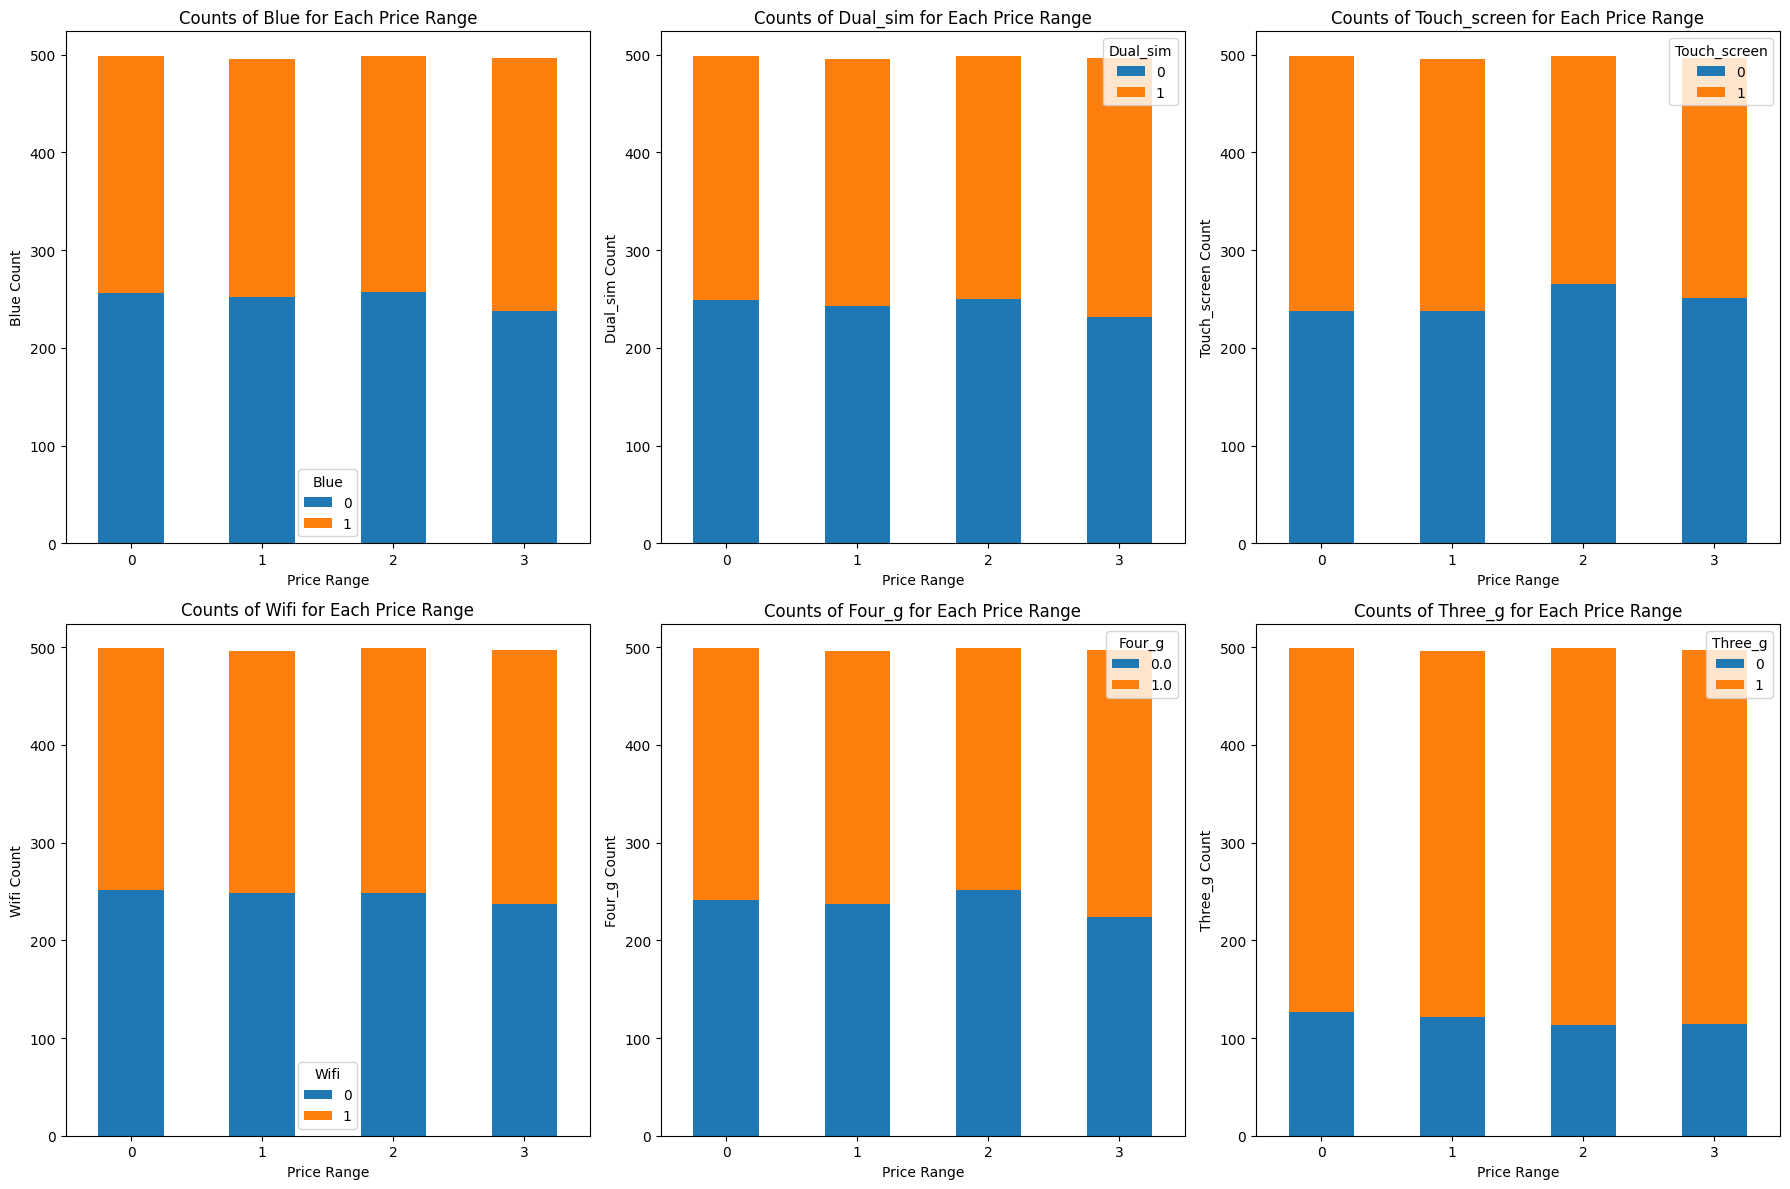

In [24]:
# Features to plot
features = ['blue', 'dual_sim', 'touch_screen', 'wifi', "four_g","three_g"]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Iterate through each feature
for idx, feature in enumerate(features[:6]):  # Limit loop to first 5 features
    if idx < 6:
        # Aggregate counts of feature for each price range
        price_feature_counts = train_df.groupby('price_range')[feature].value_counts().unstack()
        
        # Plotting
        ax = axes[idx // 3, idx % 3]
        price_feature_counts.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(f'Counts of {feature.capitalize()} for Each Price Range')
        ax.set_xlabel('Price Range')
        ax.set_ylabel(f'{feature.capitalize()} Count')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
        ax.legend(title=feature.capitalize())
    else:
        # Remove axis for the empty subplot
        axes.flatten()[idx].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

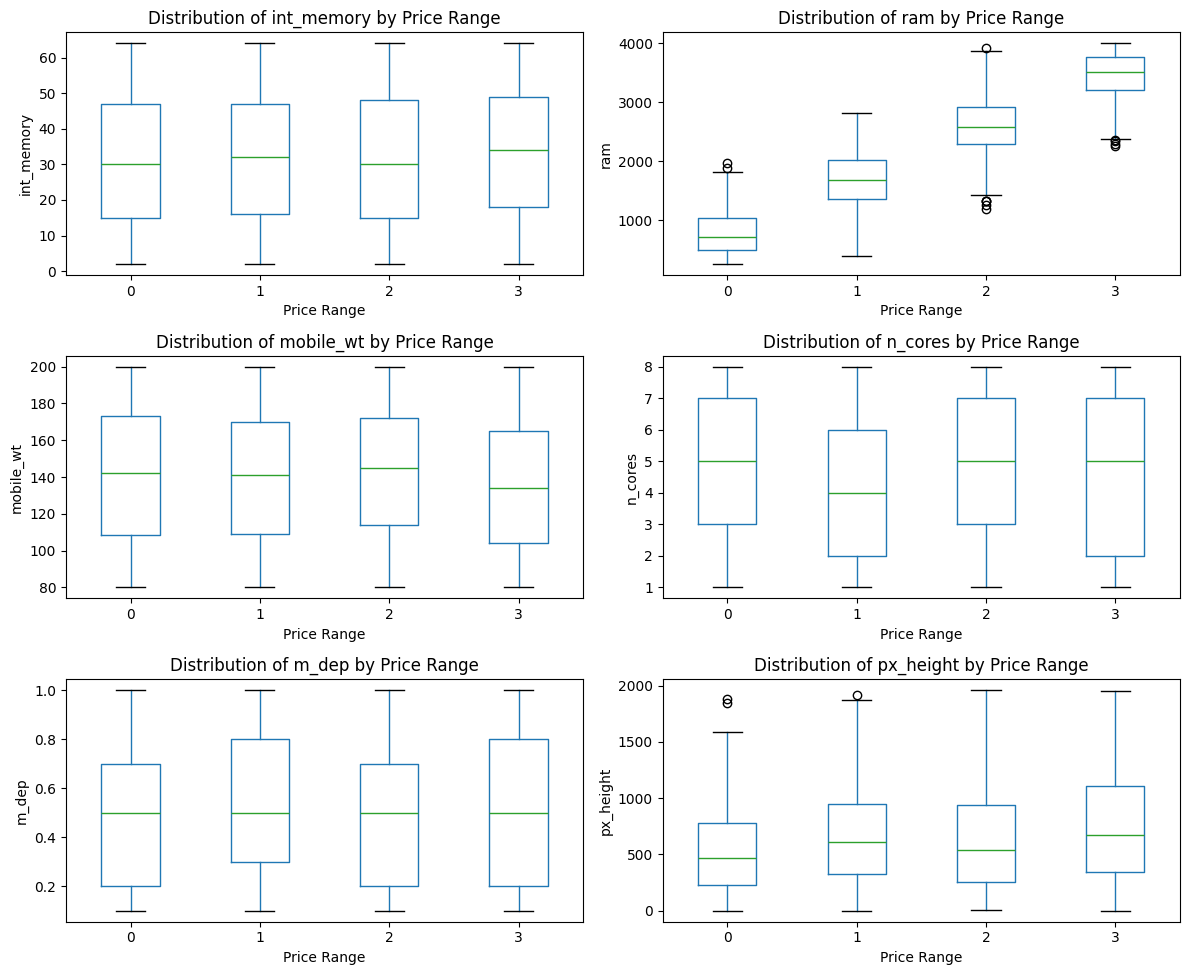

In [25]:
# Creating a list of the columns to plot
columns_to_plot = ['int_memory', 'ram', 'mobile_wt', 'n_cores','m_dep','px_height','px_width' ]

# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

# Loop through each column and create a box plot
for ax, column in zip(axes, columns_to_plot):
    train_df.boxplot(column=column, by='price_range', ax=ax)
    ax.set_title(f'Distribution of {column} by Price Range')
    ax.set_xlabel('Price Range')
    ax.set_ylabel(column)
    ax.grid(False)  # Turn off the grid if you prefer

# Adjust layout and remove the default title
plt.suptitle('')
plt.tight_layout()
plt.show()


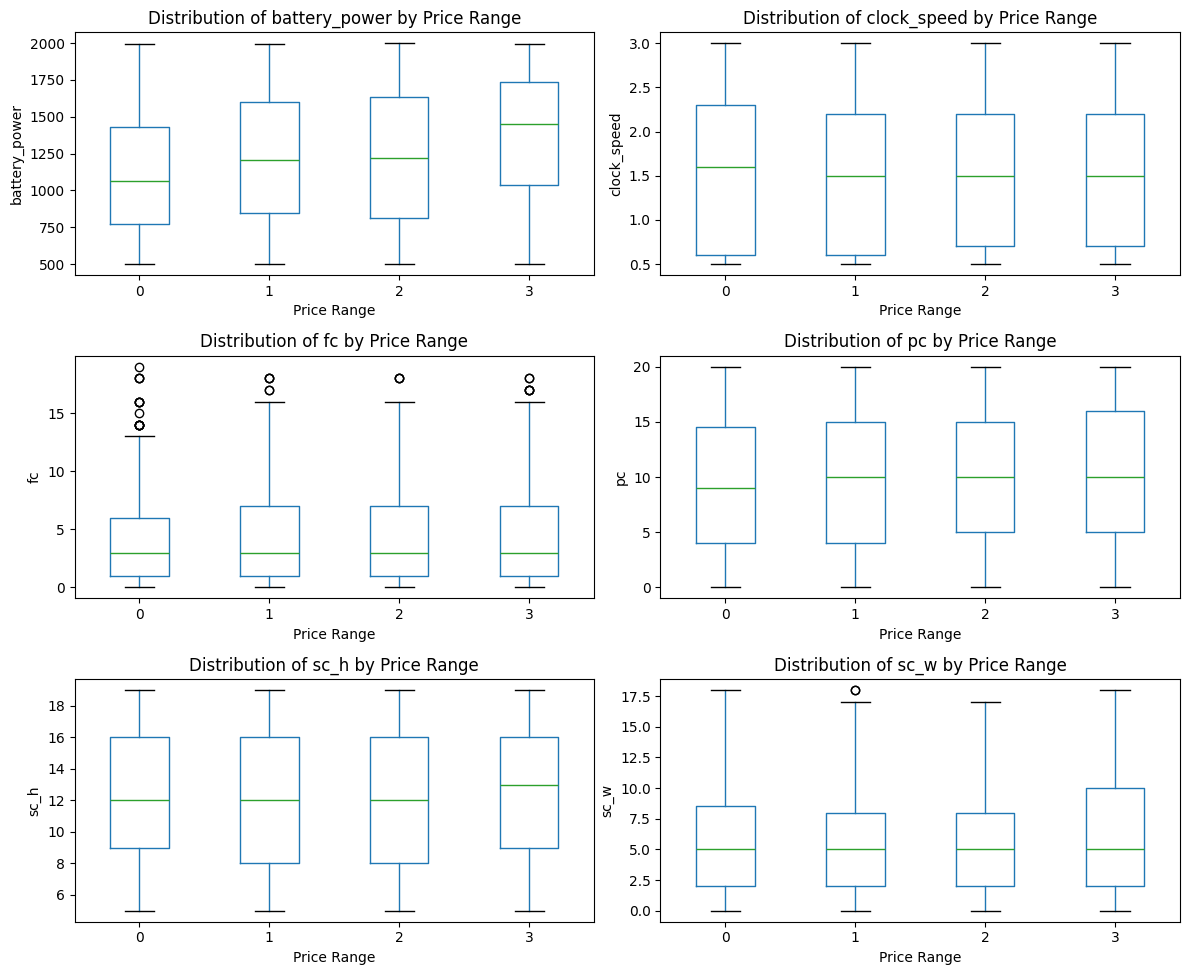

In [26]:
columns_to_plot = ['battery_power','clock_speed','fc','pc','sc_h','sc_w','talk_time','price_range']

# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

# Loop through each column and create a box plot
for ax, column in zip(axes, columns_to_plot):
    train_df.boxplot(column=column, by='price_range', ax=ax)
    ax.set_title(f'Distribution of {column} by Price Range')
    ax.set_xlabel('Price Range')
    ax.set_ylabel(column)
    ax.grid(False)  # Turn off the grid if you prefer

# Adjust layout and remove the default title
plt.suptitle('')
plt.tight_layout()
plt.show()


In [27]:
train_df['blue'].value_counts()

blue
0    1003
1     988
Name: count, dtype: int64

In [28]:
# Calculate Spearman correlation between fc and price_range
spearman_corr = train_df['fc'].corr(train_df['price_range'], method='spearman')
print(f"Spearman Correlation between 'fc' and 'price_range': {spearman_corr}")


Spearman Correlation between 'fc' and 'price_range': 0.026570596469982263


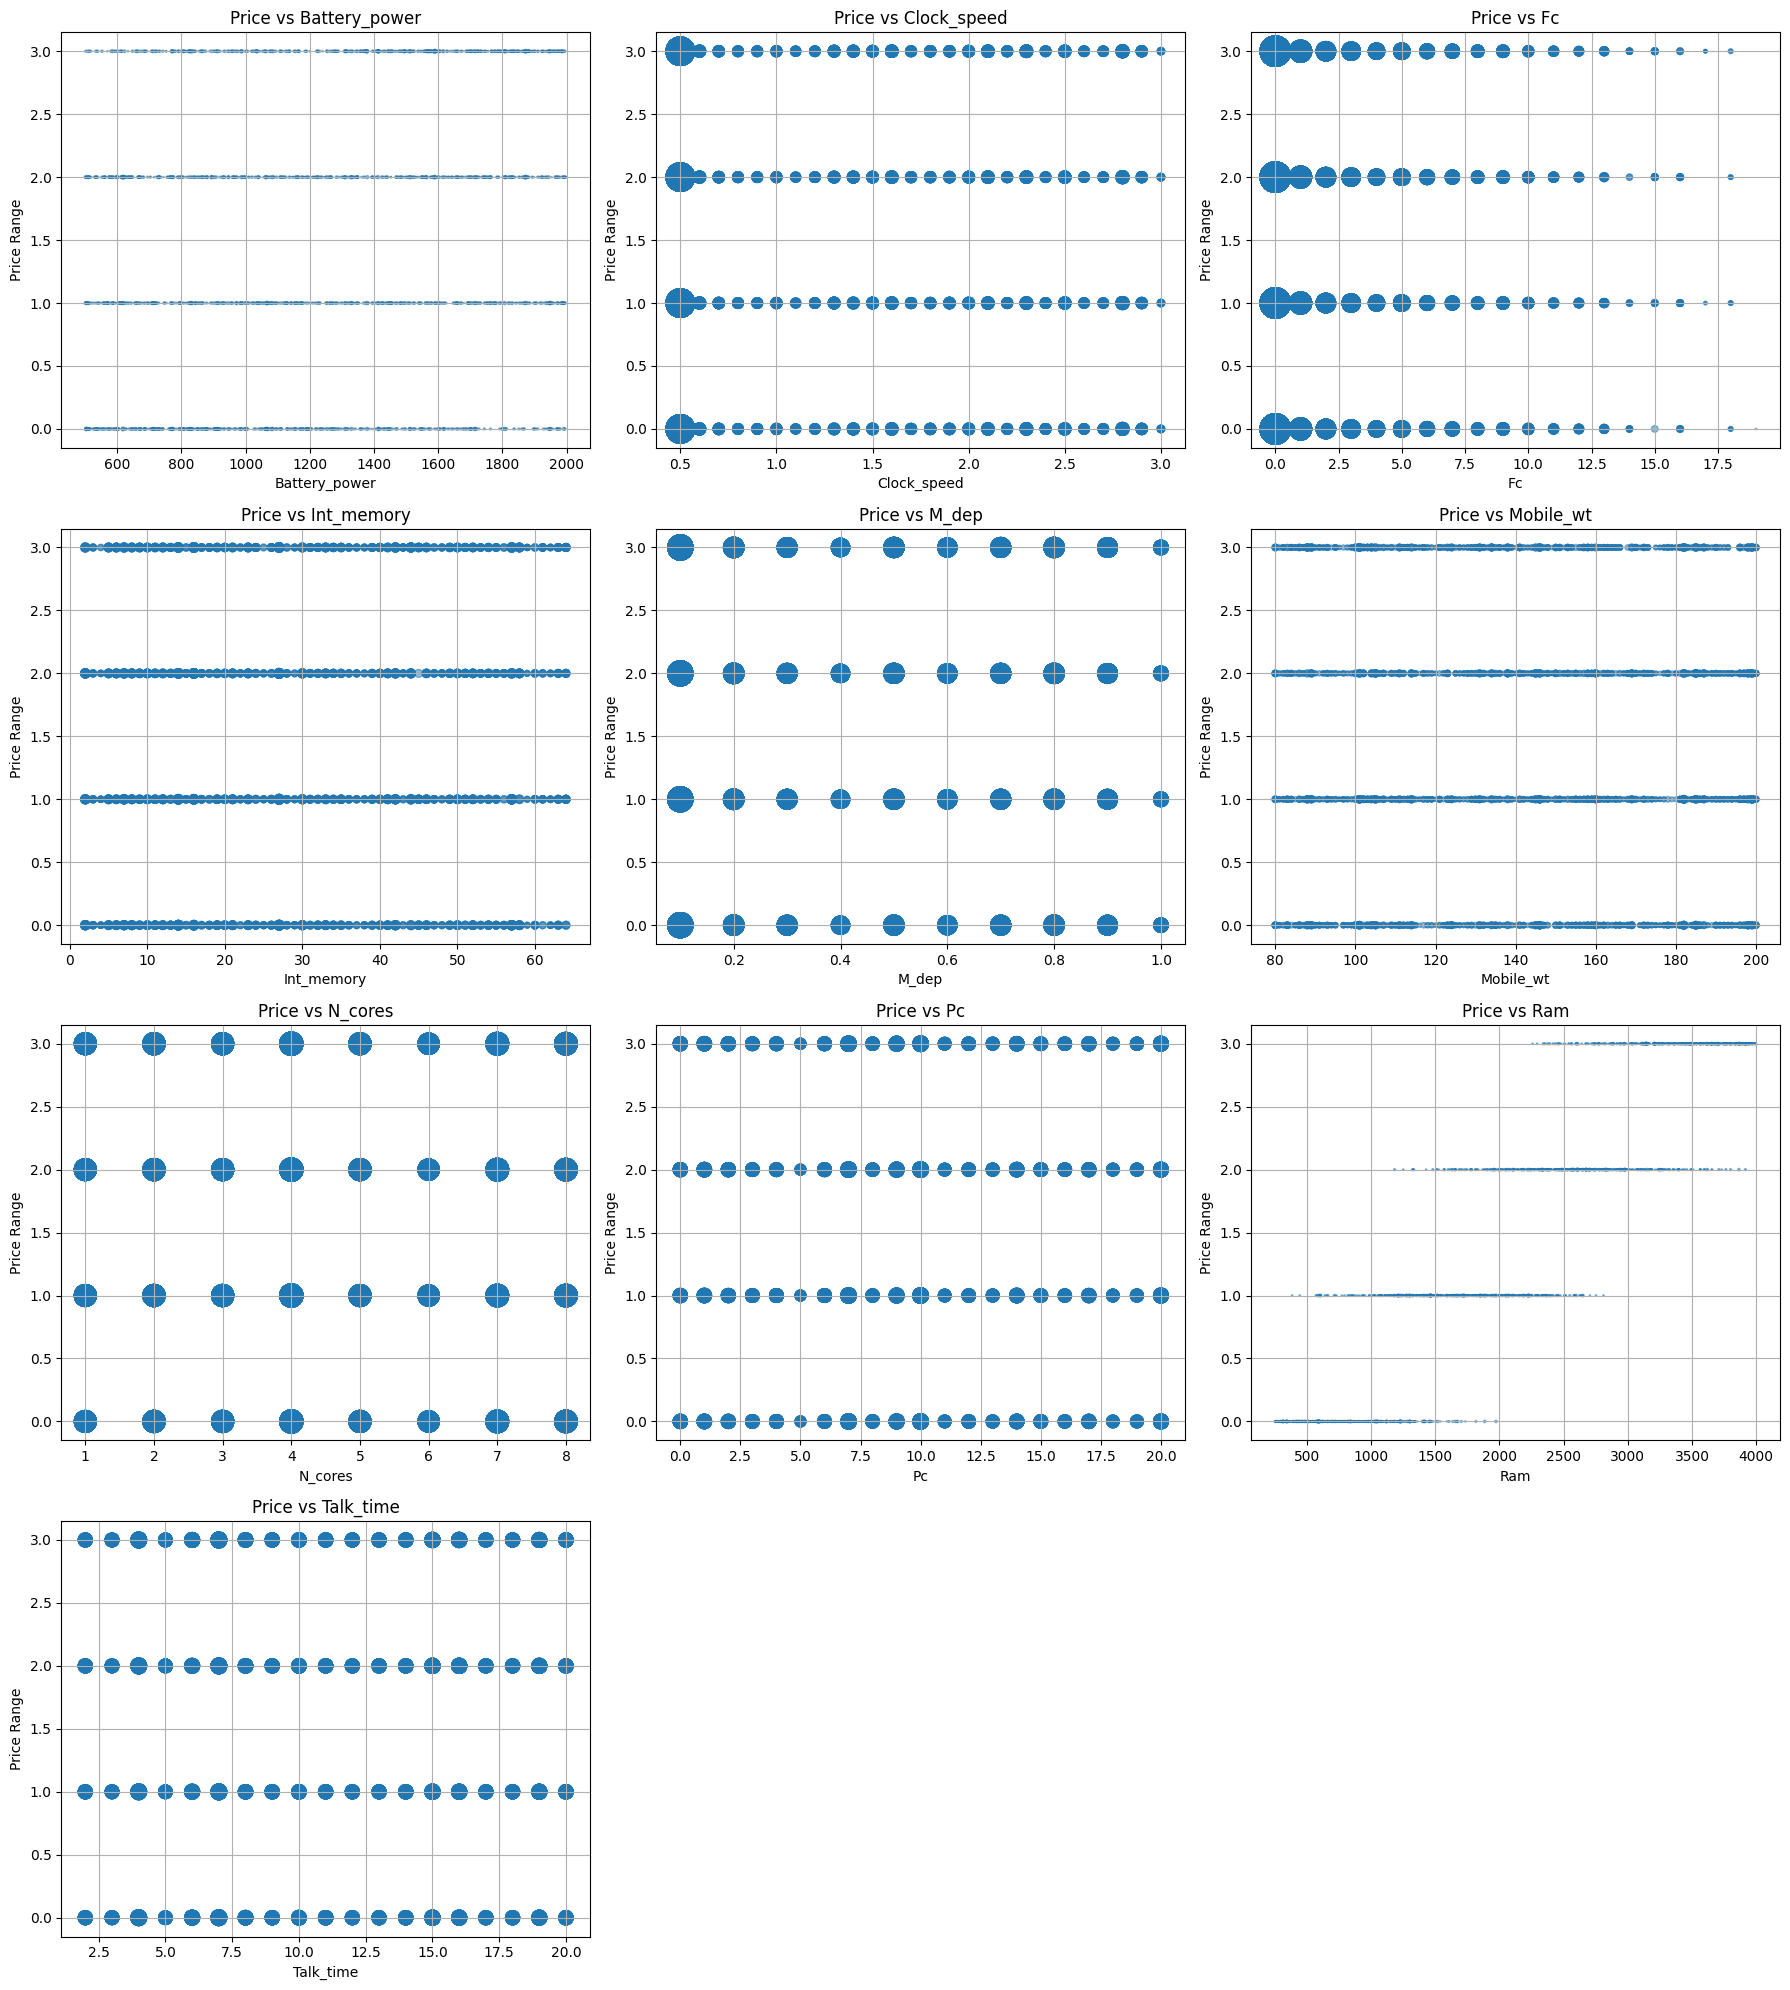

In [29]:
# Features to plot
features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 
            'n_cores', 'pc', 'ram', 'talk_time']
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20))

# Iterate through each feature
for idx, feature in enumerate(features[:12]):
    # Calculate the count of each value in the feature column
    counts = train_df[feature].value_counts()
    
    # Scatter plot for price vs feature with point size adjusted by count
    ax = axes[idx // 3, idx % 3]
    ax.scatter(train_df[feature], train_df['price_range'], s=counts[train_df[feature]], alpha=0.5)
    ax.set_title(f'Price vs {feature.capitalize()}')
    ax.set_xlabel(f'{feature.capitalize()}')
    ax.set_ylabel('Price Range')
    ax.grid(True)

# Remove empty subplots if any
if len(features) < 12:
    for i in range(len(features), 12):
        fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()
plt.show()


In [30]:
from scipy import stats

# List of numerical features to test using ANOVA
features = train_df.drop(columns='price_range',axis='1').columns

# Dictionary to store ANOVA results
anova_results = {'Feature': [], 'F-Statistic': [], 'p-value': []}

# Perform ANOVA for each feature
for feature in features:
    anova_result = stats.f_oneway(
        train_df[train_df['price_range'] == 0][feature].dropna(),
        train_df[train_df['price_range'] == 1][feature].dropna(),
        train_df[train_df['price_range'] == 2][feature].dropna(),
        train_df[train_df['price_range'] == 3][feature].dropna()
    )
    # Append the results to the dictionary
    anova_results['Feature'].append(feature)
    anova_results['F-Statistic'].append(anova_result.statistic)
    anova_results['p-value'].append(anova_result.pvalue)

# Convert the results dictionary into a pandas DataFrame
anova_df = pd.DataFrame(anova_results)

# Print the ANOVA results table
print(anova_df)


          Feature  F-Statistic       p-value
0   battery_power    31.265631  9.574564e-20
1            blue     0.563687  6.389888e-01
2     clock_speed     0.558599  6.423915e-01
3        dual_sim     0.488968  6.899694e-01
4              fc     0.868753  4.565773e-01
5          four_g     0.993211  3.950062e-01
6      int_memory     2.689842  4.488438e-02
7           m_dep     1.734418  1.578759e-01
8       mobile_wt     3.724238  1.097104e-02
9         n_cores     2.703144  4.408932e-02
10             pc     0.877572  4.519704e-01
11      px_height    19.656347  1.477786e-12
12       px_width    22.091711  4.522712e-14
13            ram  3524.134179  0.000000e+00
14           sc_h     2.179084  8.855836e-02
15           sc_w     1.709553  1.629852e-01
16      talk_time     1.608283  1.854454e-01
17        three_g     0.491686  6.880798e-01
18   touch_screen     1.272604  2.821336e-01
19           wifi     0.303238  8.230782e-01


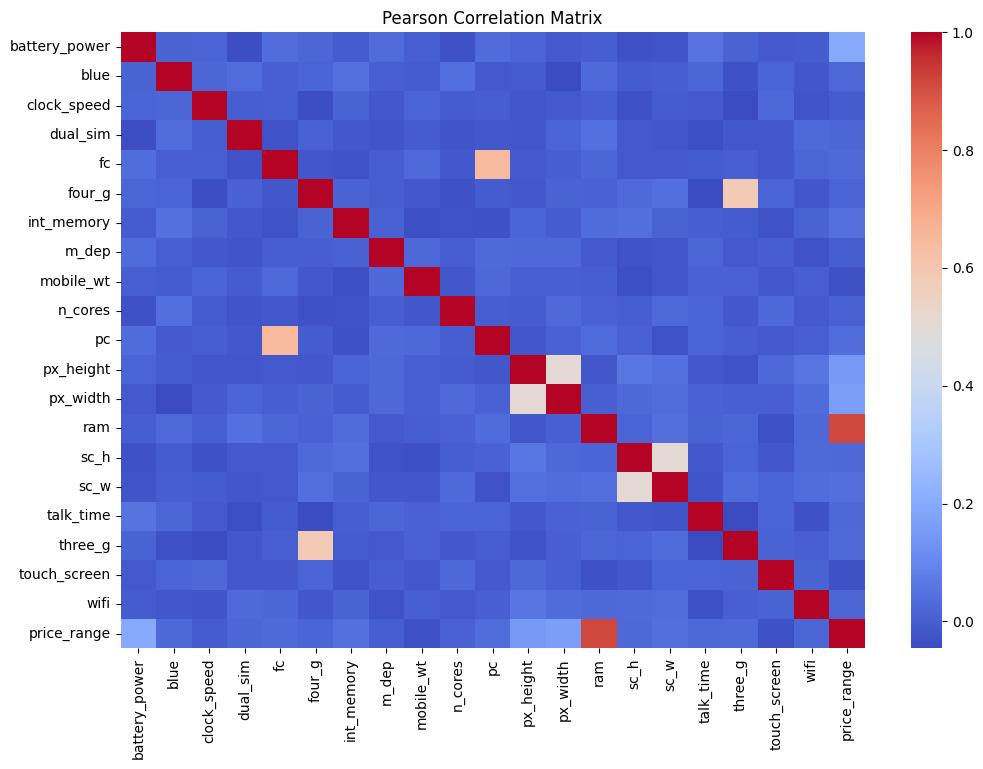

In [31]:
# Pearson Correlation Matrix
pearson_corr_matrix = train_df.corr(method='pearson')
# Spearman Correlation Matrix
spearman_corr_matrix = train_df.corr(method='spearman')

# Visualize Pearson Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr_matrix, annot=False, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()


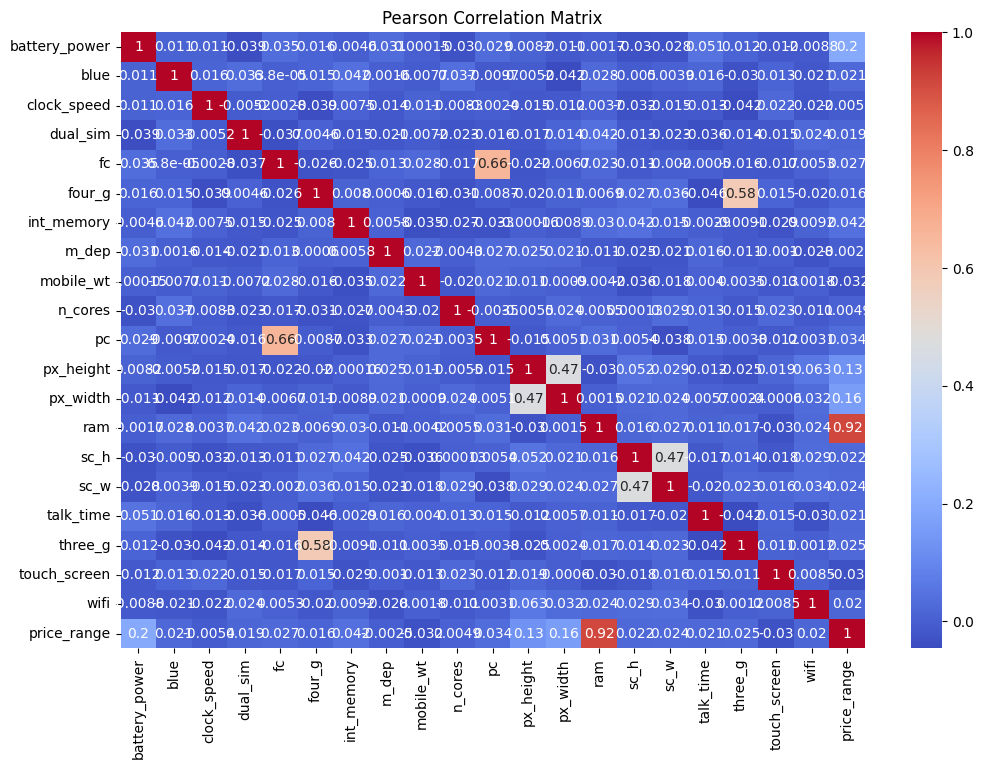

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

In [33]:
# Calculate the correlation matrix
# Calculate the correlation matrix
corr_matrix = train_df.corr()

# Extract the correlation values of the target (price_range)
target_corr = corr_matrix['price_range']

# Filter columns that have a correlation less than 1 with the target
columns_to_drop = target_corr[target_corr < 0.1].index.tolist()

# Drop the identified columns from the DataFrame
train_df = train_df.drop(columns=columns_to_drop)

# Print remaining columns
print("Remaining columns after dropping:", train_df.columns)



Remaining columns after dropping: Index(['battery_power', 'px_height', 'px_width', 'ram', 'price_range'], dtype='object')


seams like ram has the highest effect on the prediction model beside of the ram, according to every correlation we viewed it seems that there is neither real relationship between the target and any other column nor internal relation between columns. the best approach here is only keeping ram and predict our target on it, but since we are being tested we will not do this, we will keep columns with at least above 0.1 correlation with target

## 4) Feature Engineering

In [35]:
train_df.isna().sum()

battery_power    0
px_height        0
px_width         0
ram              0
price_range      0
dtype: int64

To avoid data leakage we will spllit data

In [36]:
from sklearn.model_selection import train_test_split

X = train_df.drop(['price_range'], axis=1)
y = train_df['price_range']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
"""from sklearn.preprocessing import StandardScaler


def feature_engineering(df, fit_scaler=True, scaler=None):
    # Calculate pixel density
    df['pixel_density'] = (df['px_height'] + df['px_width'])
    
    # Log transformation
    df['log_ram'] = np.log1p(df['ram'])
    df['log_battery_power'] = np.log1p(df['battery_power'])
    
    # Binning
    df['battery_power_bins'] = pd.qcut(df['battery_power'], q=4, labels=False)
    df['ram_bins'] = pd.qcut(df['ram'], q=4, labels=False)
    
    # Drop original columns
    df = df.drop(columns=['px_height', 'px_width'], axis=1)

    # List of numerical features to scale
    numerical_features =df.columns  # Adjust this list as necessary

    # Normalize or standardize features
    if fit_scaler:
        scaler = StandardScaler()
        df[numerical_features] = scaler.fit_transform(df[numerical_features])
    else:
        df[numerical_features] = scaler.transform(df[numerical_features])
    
    return df, scaler

# Apply feature engineering to X_train and X_val with proper scaling
X_train, scaler = feature_engineering(X_train, fit_scaler=True)
X_val, _ = feature_engineering(X_val, fit_scaler=False, scaler=scaler)"""


"from sklearn.preprocessing import StandardScaler\n\n\ndef feature_engineering(df, fit_scaler=True, scaler=None):\n    # Calculate pixel density\n    df['pixel_density'] = (df['px_height'] + df['px_width'])\n    \n    # Log transformation\n    df['log_ram'] = np.log1p(df['ram'])\n    df['log_battery_power'] = np.log1p(df['battery_power'])\n    \n    # Binning\n    df['battery_power_bins'] = pd.qcut(df['battery_power'], q=4, labels=False)\n    df['ram_bins'] = pd.qcut(df['ram'], q=4, labels=False)\n    \n    # Drop original columns\n    df = df.drop(columns=['px_height', 'px_width'], axis=1)\n\n    # List of numerical features to scale\n    numerical_features =df.columns  # Adjust this list as necessary\n\n    # Normalize or standardize features\n    if fit_scaler:\n        scaler = StandardScaler()\n        df[numerical_features] = scaler.fit_transform(df[numerical_features])\n    else:\n        df[numerical_features] = scaler.transform(df[numerical_features])\n    \n    return df, sca

In [38]:
def feature_engineering(df, fit_scaler=True, scaler=None, bin_edges=None):
    # Calculate pixel density
    df['pixel_density'] = df['px_height'] + df['px_width']
    
    # Log transformation
    df['log_ram'] = np.log1p(df['ram'])
    df['log_battery_power'] = np.log1p(df['battery_power'])

    # Binning logic
    if bin_edges is None:  # During training, calculate the bin edges
        df['battery_power_bins'], battery_power_bins_edges = pd.qcut(df['battery_power'], q=4, labels=False, retbins=True, duplicates='drop')
        df['ram_bins'], ram_bins_edges = pd.qcut(df['ram'], q=4, labels=False, retbins=True, duplicates='drop')
        
        # Save these edges for later use
        bin_edges = {
            'battery_power': battery_power_bins_edges,
            'ram': ram_bins_edges
        }
    else:  # During prediction, reuse the saved bin edges
        df['battery_power_bins'] = pd.cut(df['battery_power'], bins=bin_edges['battery_power'], labels=False, include_lowest=True)
        df['ram_bins'] = pd.cut(df['ram'], bins=bin_edges['ram'], labels=False, include_lowest=True)

    # Drop original columns
    df = df.drop(columns=['px_height', 'px_width'], axis=1)

    # List of numerical features to scale
    numerical_features = ['battery_power', 'pixel_density', 'log_ram', 'log_battery_power', 'ram']  # Adjust as needed

    # Scale numerical features
    if fit_scaler:
        scaler = StandardScaler()
        df[numerical_features] = scaler.fit_transform(df[numerical_features])
    else:
        df[numerical_features] = scaler.transform(df[numerical_features])

    return df, scaler, bin_edges  # Return bin_edges and scaler when training


X_train, scaler , bin_edges = feature_engineering(X_train, fit_scaler=True)
X_val ,_, _ = feature_engineering(X_val, fit_scaler=False, scaler=scaler, bin_edges=bin_edges)



In [39]:
import joblib
# Assuming 'model' is your trained SVC model
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [40]:
joblib.dump(bin_edges, 'bin_edges.pkl')

['bin_edges.pkl']

## 5) modeling and training

In [42]:
X_val.isna().sum()

battery_power         0
ram                   0
pixel_density         0
log_ram               0
log_battery_power     0
battery_power_bins    0
ram_bins              1
dtype: int64

In [46]:
X_val=X_val.fillna(X_val.median())

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the training set
logistic_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = logistic_model.predict(X_val)

# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)


Accuracy: 0.9549
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       106
           1       0.90      0.96      0.93        89
           2       0.95      0.93      0.94       107
           3       0.96      0.99      0.97        97

    accuracy                           0.95       399
   macro avg       0.95      0.96      0.95       399
weighted avg       0.96      0.95      0.96       399



In [49]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training set
dt_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = dt_model.predict(X_val)

# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)


Accuracy: 0.9023
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       106
           1       0.82      0.88      0.85        89
           2       0.91      0.84      0.87       107
           3       0.93      0.96      0.94        97

    accuracy                           0.90       399
   macro avg       0.90      0.90      0.90       399
weighted avg       0.90      0.90      0.90       399



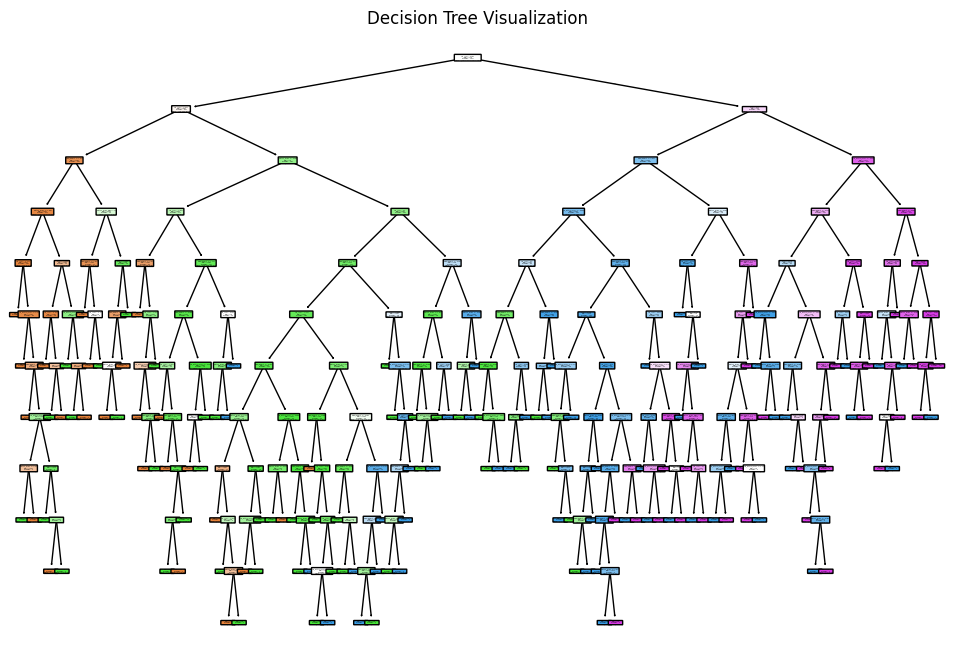

In [50]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


In [51]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVC model
svc_model = SVC(C=1, kernel="linear", gamma=2.5)

# Fit the model on the training set
svc_model.fit(X_train, y_train)

# Make predictions on the training and validation sets
y_train_pred = svc_model.predict(X_train)
y_val_pred = svc_model.predict(X_val)

# Evaluate the model's performance on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

# Evaluate the model's performance on validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Training Accuracy: {train_accuracy:.4f}')
print('Training Classification Report:')
print(train_report)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)


Training Accuracy: 0.9585
Training Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       393
           1       0.96      0.96      0.96       407
           2       0.94      0.94      0.94       392
           3       0.96      0.96      0.96       400

    accuracy                           0.96      1592
   macro avg       0.96      0.96      0.96      1592
weighted avg       0.96      0.96      0.96      1592

Validation Accuracy: 0.9549
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       106
           1       0.92      0.98      0.95        89
           2       0.96      0.91      0.93       107
           3       0.94      0.98      0.96        97

    accuracy                           0.95       399
   macro avg       0.95      0.96      0.95       399
weighted avg       0.96      0.95      0.95       399



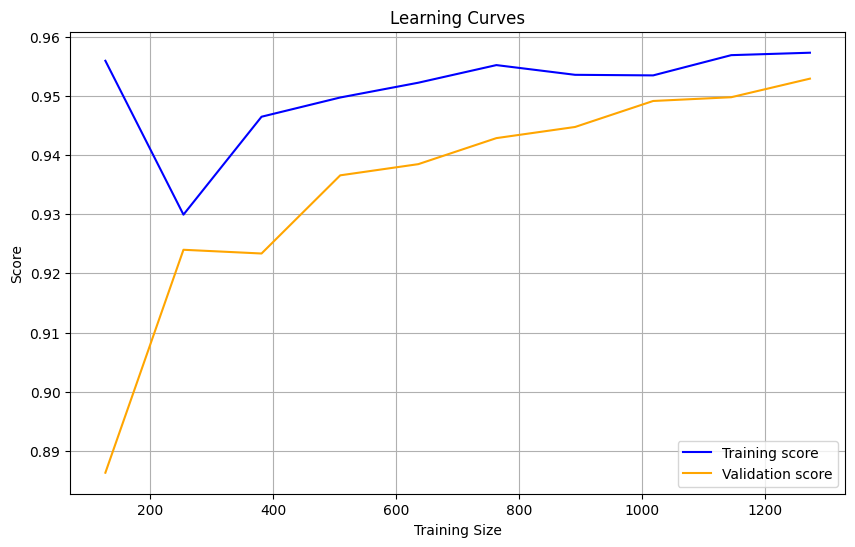

In [52]:
from sklearn.model_selection import learning_curve

# Function to plot learning curves
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

    train_scores_mean = train_scores.mean(axis=1)
    val_scores_mean = val_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
    plt.plot(train_sizes, val_scores_mean, label='Validation score', color='orange')
    plt.title('Learning Curves')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend()
    plt.grid()
    plt.show()

# Plot learning curves for SVC
plot_learning_curve(svc_model, X_train, y_train)


From the learning curve, we can observe the following:

Training Score: The blue curve represents the training score, which starts around 0.95, dips slightly at the beginning, but quickly stabilizes and stays above 0.94. This indicates that the model performs very well on the training set, maintaining a high score with increasing training size.

Validation Score: The orange curve represents the validation score, which starts lower around 0.89 but gradually improves as the training size increases. The validation score continues to rise and approaches the training score as more data is used, reaching around 0.95 by the end.

Analysis:
The fact that both the training and validation scores are close to each other suggests that the model is not overfitting and is generalizing well to unseen data.
The upward trend of the validation score indicates that the model benefits from more training data and is learning better with an increasing sample size.

Recommendations:
No signs of overfitting: Since the training and validation scores are closely aligned, overfitting is not a significant concern in this model.
we might want to experiment further with hyperparameter tuning (e.g., different C or gamma values) to see if the model can achieve even better performancer.

In [53]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the parameter grid for Grid Search
param_grid = {
    'C': [1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'] + [ 0.01, 0.1, 1, 10, 100],  # Kernel coefficient
    'kernel': ['linear', 'rbf']  # Kernel type
}
# Initialize the SVC model
svc = SVC(random_state=42)

# Set up Grid Search
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)


# Fit the model
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f'Best Parameters: {best_params}')


Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


In [54]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Make predictions with the best model
y_pred = best_model.predict(X_val)

# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print(f'Validation Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
conf_matrix

Validation Accuracy: 0.9599
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       106
           1       0.92      0.98      0.95        89
           2       0.95      0.93      0.94       107
           3       0.97      0.97      0.97        97

    accuracy                           0.96       399
   macro avg       0.96      0.96      0.96       399
weighted avg       0.96      0.96      0.96       399



array([[102,   4,   0,   0],
       [  0,  87,   2,   0],
       [  0,   4, 100,   3],
       [  0,   0,   3,  94]])

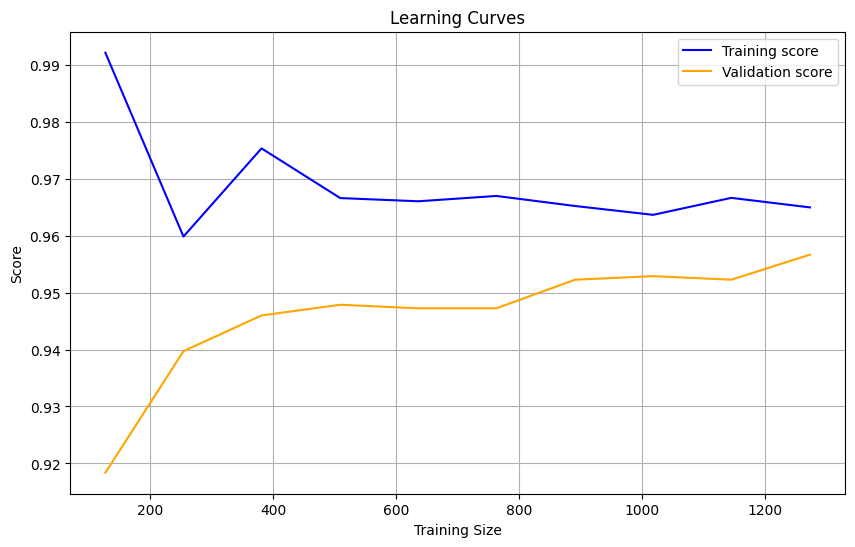

In [55]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

    train_scores_mean = train_scores.mean(axis=1)
    val_scores_mean = val_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
    plt.plot(train_sizes, val_scores_mean, label='Validation score', color='orange')
    plt.title('Learning Curves')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend()
    plt.grid()
    plt.show()

# Plot learning curves for the best model
plot_learning_curve(best_model, X_train, y_train)


In [57]:
import joblib

# Assuming 'model' is your trained SVC model
joblib.dump(best_model, 'svc_model.pkl')


['svc_model.pkl']

In [58]:
svc_model = joblib.load('svc_model.pkl')


In [59]:
# Select specific columns from the dataframe
test_df = test_df[['battery_power', 'px_height', 'px_width', 'ram']]


In [61]:
test_df = test_df.fillna(test_df.median())  # Filling NaNs in numeric columns with median

test_df ,_, _ = feature_engineering(test_df, fit_scaler=False, scaler=scaler, bin_edges=bin_edges)


In [64]:
# Select the first 10 rows
X_test = test_df.head()

# Make predictions
predictions = svc_model.predict(X_test)

# Print the predictions
print("Predictions for the first 10 rows:")
print(predictions)


Predictions for the first 10 rows:
[3 3 2 3 1]
